# Loading Dataset 

In [56]:
import numpy as np 
import pandas as pd
import cv2
import os 

# label extraction

In [57]:
features = pd.read_csv('data/features.csv', header=None)
labels = pd.read_csv('data/labels.csv', header=None)

In [58]:
labels_ = []
for i in range(len(labels)):
    if '-' in labels[0][i]:
        labels[0][i] = labels[0][i].replace('-','_')
    labels_.append(labels[0][i].split('_'))

In [59]:
labels_df = pd.DataFrame(labels_)
labels_df.drop(4, axis=1, inplace=True)
labels_df.drop(0, axis=1, inplace=True)

labels_df.columns = ['type', 'model', 'category']
labels_df.replace('forest', 'jungle', inplace=True)
labels_df.replace('Jungle', 'jungle', inplace=True)
labels_df.replace('junlge', 'jungle', inplace=True)
labels_df.replace('Mountain', 'mountain', inplace=True)
labels_df.replace('Sea', 'sea', inplace=True)
labels_df.replace('sea5.jpeg', 'sea', inplace=True)
labels_df.replace('see', 'sea', inplace=True)

labels_df.replace('dreamstudio', 'stable', inplace=True)
labels_df.replace('Stable', 'stable', inplace=True)
labels_df.replace('dreamai', 'stable', inplace=True)
labels_df.replace('dream', 'stable', inplace=True)
labels_df.replace('dalleminibot', 'dalle', inplace=True)
labels_df.replace('dalleminbot', 'dalle', inplace=True)
labels_df.replace('DALL.E', 'dalle', inplace=True)
labels_df.replace('DALLE', 'dalle', inplace=True)
labels_df.replace('dall.e', 'dalle', inplace=True)
labels_df.replace('delle', 'dalle', inplace=True)
labels_df.replace('DallE', 'dalle', inplace=True)
labels_df.replace('dall', 'dalle', inplace=True)
labels_df.replace('midjourney', 'dalle', inplace=True)
labels_df.replace('dallemini', 'dalle', inplace=True)
labels_df.replace('dall', 'dalle', inplace=True)
labels_df.replace('craiyon', 'dalle', inplace=True)
labels_df.replace('bing', 'dalle', inplace=True)
labels_df.replace('None', 'none', inplace=True)

labels_df.replace('Real', 'real', inplace=True)
labels_df.replace('Fake', 'fake', inplace=True)

In [60]:
for i in labels_df.loc[labels_df.type.isna()].index.values:
    features.drop(i, axis=0, inplace=True)
    labels_df.drop(i, axis=0, inplace=True)

In [61]:
labels_df.isna().any()

type        False
model       False
category    False
dtype: bool

In [62]:
features.reset_index(drop=True, inplace=True)
labels_df.reset_index(drop=True, inplace=True)

In [63]:
features

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.522970,0.299877,1.854656,-0.127650,0.813650,-0.148206,0.086093,-0.099617,-0.060342,2.059088,...,-0.105705,-0.139349,-0.058845,2.431875,0.062066,-0.245895,0.086882,-0.126205,0.218028,0.169009
1,0.013961,0.122444,-0.132735,-0.118628,0.173108,-0.136272,-0.084335,-0.131051,0.161909,0.824182,...,-0.113773,-0.165884,-0.113729,0.221492,-0.142989,-0.146476,0.226548,-0.138845,0.201534,0.249506
2,0.538563,0.509407,1.775910,-0.127933,1.709609,-0.140871,0.127283,-0.092119,-0.083881,1.833654,...,-0.083452,-0.139409,-0.090185,1.966274,-0.121026,-0.134771,0.824233,-0.107500,0.530300,0.368836
3,-0.074457,-0.116068,-0.196760,-0.011271,-0.168376,1.241772,-0.116697,-0.029380,-0.040485,-0.107858,...,0.860665,-0.084137,0.326265,-0.254838,-0.131203,0.494691,-0.008144,-0.004061,-0.208142,-0.168128
4,-0.051129,-0.174848,-0.028430,1.820420,-0.089466,2.193471,0.114552,-0.029080,3.765160,-0.053691,...,5.197541,1.984923,1.948692,-0.195730,-0.029222,3.375637,0.439649,0.881086,-0.012821,-0.026665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,0.188845,0.181740,0.000457,-0.133928,0.575991,-0.167212,0.093093,-0.111037,-0.112299,0.514472,...,-0.075440,-0.164179,-0.101755,0.973446,0.586366,-0.112277,-0.200143,-0.107301,0.880406,0.564792
3414,0.069198,-0.091497,0.124390,-0.169842,0.235213,-0.221722,-0.084336,-0.168707,-0.071297,0.257700,...,-0.099730,-0.154313,-0.100462,0.484658,0.865008,-0.115266,-0.130826,-0.148095,0.845961,0.496394
3415,0.220922,-0.025789,0.154959,-0.162007,0.248210,-0.193766,-0.148826,-0.153745,-0.106148,1.394486,...,-0.100166,-0.174926,-0.096002,0.072601,-0.136642,-0.139678,0.284274,-0.143948,0.323482,0.430027
3416,-0.099168,-0.126265,-0.089775,0.245519,-0.126568,1.240803,-0.120931,-0.040557,1.584138,-0.139105,...,1.359986,0.430271,0.511444,-0.260776,-0.101833,1.298561,0.006774,0.390692,-0.125927,-0.158199


In [64]:
labels_df

,type,model,category
0,fake,stable,mountain
1,fake,stable,jungle
2,fake,stable,mountain
3,real,none,jungle
4,real,none,jungle
...,...,...,...
3413,fake,dalle,jungle
3414,fake,stable,mountain
3415,fake,stable,mountain
3416,real,none,jungle


In [65]:
features.to_csv('features_processed.csv', index=False)
labels_df.to_csv('labels_processed.csv', index=False)

# feature extraction

In [66]:
# directories 
current_dir = os.getcwd()
path_data = os.path.join(current_dir, "data")
path_real_data = os.path.join(path_data, "real")
path_fake_data = os.path.join(path_data, "fake")
path_features = os.path.join(path_data, "features.csv")
path_labels = os.path.join(path_data, "labels.csv")

In [67]:
print(f"current directory is {current_dir}")
print(f"data directory is {path_data}")
print(f"real data directory is {path_real_data}")
print(f"fake data directory is {path_fake_data}")
print(f"features directory is {path_features}")
print(f"labels directory is {path_labels}")

current directory is d:\python\university\ML_tavasoli\project
data directory is d:\python\university\ML_tavasoli\project\data
real data directory is d:\python\university\ML_tavasoli\project\data\real
fake data directory is d:\python\university\ML_tavasoli\project\data\fake
features directory is d:\python\university\ML_tavasoli\project\data\features.csv
labels directory is d:\python\university\ML_tavasoli\project\data\labels.csv


In [68]:
class LoadImages:
    def __init__(self, path_real: str, path_fake: str) -> None:
        self.path_real = path_real
        self.path_fake = path_fake 
        
    def load(self, path_data):
        X = []
        y = []
        
        for image_path in os.listdir(path_data):
            try:
                image = cv2.imread(os.path.join(path_data, image_path), cv2.IMREAD_COLOR)
                image = cv2.resize(image, (150, 150))
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                X.append(image_rgb)
                
                if "fake" in image_path or "Fake" in image_path:
                    y.append(0)
                    
                elif "real" in image_path or "Real" in image_path: 
                    y.append(1)
            
            except:
                pass
            
        return np.array(X), np.array(y).reshape(-1, 1)
    
    def __call__(self):
        x_fake, y_fake = self.load(self.path_fake)
        x_real, y_real = self.load(self.path_real)
        
        X = np.vstack((x_fake, x_real))
        y = np.vstack((y_fake, y_real))
        return X, y


In [69]:
images, labels = LoadImages(path_fake=path_fake_data, path_real=path_real_data)()

In [70]:
print(images.shape)
print(labels.shape)

(3417, 150, 150, 3)
(3417, 1)


# Edge Detection based feature extraction

In [71]:
class EdgeFeatureExtraction:
    def __init__(self, images) -> None:
        self.images = images
        
    def apply_feature_extractor(self, image):
        edges = cv2.Canny(image, 100, 200)

        # Calculate the number of edges
        num_edges = np.sum(edges > 0)

        # Calculate edge statistics
        edge_mean = np.mean(edges)
        edge_std = np.std(edges)

        return [num_edges, edge_mean, edge_std]
    
    def __call__(self):
        list_images = []
        for image in self.images:
            list_images.append(self.apply_feature_extractor(image))
            
        return np.array(list_images)

In [72]:
edge_images = EdgeFeatureExtraction(images)()

In [73]:
print(f"original images shape is {images.shape} \nfeature extracted shape is {edge_images.shape}")

original images shape is (3417, 150, 150, 3) 
feature extracted shape is (3417, 3)


# Apply fourier transformation and high pass to extract feature

In [74]:
class FourierFeatureExtraction:
    def __init__(self, images) -> None:
        self.images = images
        
    def apply_feature_extractor(self, image):
        red_channel = image[:,:,0]
        green_channel = image[:,:,1]
        blue_channel = image[:,:,2]
        
        # Perform Fourier transformation on each channel
        red_f = np.fft.fft2(red_channel)
        green_f = np.fft.fft2(green_channel)
        blue_f = np.fft.fft2(blue_channel)
        
        # Shift the zero-frequency component to the center
        red_fshift = np.fft.fftshift(red_f)
        green_fshift = np.fft.fftshift(green_f)
        blue_fshift = np.fft.fftshift(blue_f)
        
        # Compute the magnitude spectra for each channel
        red_magnitude_spectrum = 20 * np.log(np.abs(red_fshift))
        green_magnitude_spectrum = 20 * np.log(np.abs(green_fshift))
        blue_magnitude_spectrum = 20 * np.log(np.abs(blue_fshift))
        
        # Flatten the magnitude spectra for each channel and concatenate them
        magnitude_flattened = cv2.merge((red_magnitude_spectrum,
                                               green_magnitude_spectrum,
                                               blue_magnitude_spectrum))
        
        return magnitude_flattened 
    
    def __call__(self):
        list_images = []
        for image in self.images:
            list_images.append(self.apply_feature_extractor(image))
            
        return np.array(list_images)
    

class HighFeatureExtraction:
    def __init__(self, images) -> None:
        self.images = images
        
    def apply_feature_extractor(self, image):
        red_channel = image[:,:,0]
        green_channel = image[:,:,1]
        blue_channel = image[:,:,2]
        
        # Apply a Gaussian blur to each color channel
        blurred_b = cv2.GaussianBlur(blue_channel, (5, 5), 0)
        blurred_g = cv2.GaussianBlur(green_channel, (5, 5), 0)
        blurred_r = cv2.GaussianBlur(red_channel, (5, 5), 0)

        # Subtract the blurred color channels from the original color channels to create a high-pass filter effect
        high_pass_b = cv2.subtract(blue_channel, blurred_b)
        high_pass_g = cv2.subtract(green_channel, blurred_g)
        high_pass_r = cv2.subtract(red_channel, blurred_r)

        # Merge the high-pass filtered color channels back into an RGB image
        high_pass_image = cv2.merge((high_pass_b, high_pass_g, high_pass_r))

        return high_pass_image.mean(axis=2).flatten()
    
    def __call__(self):
        list_images = []
        for image in self.images:
            list_images.append(self.apply_feature_extractor(image))
            
        return np.array(list_images)
        

In [75]:
fourier_images = FourierFeatureExtraction(images)()
fourier_images = HighFeatureExtraction(fourier_images)()

In [76]:
print(f"original images shape is {images.shape} \nfeature extracted shape is {fourier_images.shape}")

original images shape is (3417, 150, 150, 3) 
feature extracted shape is (3417, 22500)


# HOG feature extraction method

In [77]:
from skimage.feature import hog

In [78]:
win_size = (64, 64)  # Window size for HOG computation
block_size = (16, 16)  # Block size for normalization
block_stride = (8, 8)  # Block stride
cell_size = (8, 8)  # Cell size
num_bins = 7  # Number of histogram bins

In [79]:
class HogFeatureExtraction:
    def __init__(self, images) -> None:
        self.images = images
        
    def apply_feature_extractor(self, 
                                image: np.array, 
                                win_size: set, 
                                block_size: set, 
                                block_stride:set, 
                                cell_size: set, 
                                num_bins: int) -> np.array:
        hog_image = hog(image, 
                        orientations=num_bins, 
                        pixels_per_cell=cell_size,
                        cells_per_block=block_size, 
                        block_norm='L2-Hys',
                        visualize=False, 
                        feature_vector=True, 
                        channel_axis=-1)
        return hog_image
    
    def __call__(self, 
                 win_size: set, 
                 block_size: set, 
                 block_stride:set, 
                 cell_size: set, 
                 num_bins: int) -> np.array:
        
        list_images = []
        for image in self.images:
            list_images.append(self.apply_feature_extractor(image, 
                                                            win_size=win_size, 
                                                            block_size=block_size, 
                                                            block_stride=block_stride, 
                                                            cell_size=cell_size, 
                                                            num_bins=num_bins))
            
        return np.array(list_images)
            

In [80]:
hog_images = HogFeatureExtraction(images)(win_size, block_size, block_stride, cell_size, num_bins)

In [81]:
print(f"original images shape is {images.shape} \nfeature extracted shape is {hog_images.shape}")

original images shape is (3417, 150, 150, 3) 
feature extracted shape is (3417, 16128)


# Gabor Filters feature extraction

In [82]:
class GaborFiltersFeatureExtraction:
    def __init__(self, images) -> None:
        self.images = images
        
    def gabor_filter(self, img, ksize, sigma, theta, lambd, gamma, psi):
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi)
        return cv2.filter2D(img, cv2.CV_32F, kernel)
    
    def apply_feature_extractor(self, img, ksize, sigma, theta, lambd, gamma, psi) -> np.array:
        gabor_image = self.gabor_filter(img, ksize, sigma, theta, lambd, gamma, psi)
        
        return gabor_image
    
    def __call__(self, ksize, sigma, theta, lambd, gamma, psi) -> np.array:
        
        list_images = []
        for image in self.images:
            list_images.append(self.apply_feature_extractor(image, 
                                                            ksize, 
                                                            sigma,
                                                            theta, 
                                                            lambd, 
                                                            gamma, 
                                                            psi))
            
        return np.array(list_images).mean(axis=3).reshape(-1, 150*150)
            

In [83]:
ksize = 31
sigma = 4
theta = np.pi / 4
lambd = 10
gamma = 0.5
psi = 0

In [84]:
gabor_images = GaborFiltersFeatureExtraction(images=images)(ksize, sigma, theta, lambd, gamma, psi)

In [85]:
print(f"original images shape is {images.shape} \nfeature extracted shape is {gabor_images.shape}")

original images shape is (3417, 150, 150, 3) 
feature extracted shape is (3417, 22500)


# Color Histograms feature extraction method

In [86]:
class ColorHistogramFeatureExtraction:
    def __init__(self, images) -> None:
        self.images = images
    
    def apply_feature_extractor(self, image, num_bins) -> np.array:
        # Compute color histograms with fewer bins
        hist_r = cv2.calcHist([image], [0], None, [num_bins], [0, 256])
        hist_g = cv2.calcHist([image], [1], None, [num_bins], [0, 256])
        hist_b = cv2.calcHist([image], [2], None, [num_bins], [0, 256])

        # Normalize histograms
        hist_r = cv2.normalize(hist_r, hist_r)
        hist_g = cv2.normalize(hist_g, hist_g)
        hist_b = cv2.normalize(hist_b, hist_b)

        # Concatenate histograms
        hist_image = np.hstack((hist_r, hist_g, hist_b)).flatten()

        
        return hist_image
    
    def __call__(self, num_bins) -> np.array:
        
        list_images = []
        for image in self.images:
            list_images.append(self.apply_feature_extractor(image, num_bins))
            
        return np.array(list_images)

In [87]:
num_bins = 256
hist_images = ColorHistogramFeatureExtraction(images=images)(num_bins)

In [88]:
print(f"original images shape is {images.shape} \nfeature extracted shape is {hist_images.shape}")

original images shape is (3417, 150, 150, 3) 
feature extracted shape is (3417, 768)


# save feature extracted images from original images with csv format

In [89]:
try:
    os.makedirs("data/image_features")
    
except:
    pd.DataFrame(hist_images).to_csv("data/image_features/hist_images.csv")
    pd.DataFrame(hog_images).to_csv("data/image_features/hog_images.csv")
    pd.DataFrame(gabor_images).to_csv("data/image_features/gabor_images.csv")
    pd.DataFrame(fourier_images).to_csv("data/image_features/fourier_images.csv")


# Analyze, preprocessing
# a) gabor filter 

In [90]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy.stats import norm
sns.set_theme()

from sklearn.decomposition import PCA, KernelPCA 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2 
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector 
from sklearn.ensemble import ExtraTreesClassifier 

In [91]:
# load dataset and clean it
gabor = pd.read_csv("data/image_features/gabor_images.csv")
gabor.drop(["Unnamed: 0"], axis=1, inplace=True)
gabor.head()

,0,1,2,3,4,5,6,7,8,9,...,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499
0,884.5528,856.43620,793.72064,704.75590,608.16620,529.88116,483.86813,481.26514,559.58514,713.80524,...,-254.15794,-235.62506,-151.869460,-12.222488,155.925460,318.242830,447.176000,533.177200,578.27470,591.69183
1,629.5973,606.56230,545.71680,473.90610,413.27335,395.33902,422.75122,499.08008,607.60547,728.91720,...,357.17070,393.74655,425.547330,443.163420,439.511140,413.688800,370.333130,325.252400,292.08200,280.12656
2,1075.9380,1007.49170,827.30270,604.67650,385.23500,234.44337,189.09239,257.56168,426.16830,632.62170,...,-494.83167,-305.32420,-49.598682,194.376650,371.729860,454.318360,436.648530,372.635900,313.83743,286.56460
3,1238.5140,1189.64480,1070.18000,898.65424,741.01270,628.24054,561.97540,511.90128,448.42282,369.60587,...,-35.06851,-46.83202,-38.893440,-22.657965,-5.862963,14.125958,38.159695,61.043324,77.77958,83.71091
4,891.8758,853.25665,739.86870,618.74365,521.79584,487.27206,504.18173,523.64730,511.39926,457.09717,...,193.72273,134.75847,35.348520,-64.236720,-110.929690,-64.166130,68.377570,241.542310,385.06314,439.12277


In [92]:
gabor.describe()

,0,1,2,3,4,5,6,7,8,9,...,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499
count,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,...,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000
mean,1092.361535,1092.505863,1093.315654,1095.018635,1098.033362,1102.990713,1109.450461,1116.908590,1124.594569,1131.751137,...,754.181894,746.012934,725.806176,700.816556,678.350899,663.237075,656.171328,655.058325,656.588164,657.560507
std,710.751053,691.609298,648.926551,615.284751,611.851166,629.267148,646.419610,652.307805,648.484483,641.582270,...,657.835090,654.677406,636.967050,606.635228,566.741156,532.474605,534.214709,583.535003,645.263919,672.413474
min,-3642.827000,-3121.340000,-1854.940400,-1404.332200,-1254.506300,-1725.896400,-1668.768000,-1887.022000,-1496.542000,-627.513240,...,-1942.483000,-1424.502600,-1512.521900,-1878.538200,-1647.629000,-953.156070,-635.043900,-1637.111000,-2576.141400,-2916.679700
25%,597.070100,597.701600,613.835450,615.857240,618.607670,624.923500,623.135100,635.534850,635.799200,643.758700,...,258.994320,255.570760,248.622180,245.772900,251.511580,261.724030,257.434940,231.549970,211.007740,205.235960
50%,1088.090000,1083.411000,1078.169600,1079.667600,1083.479500,1090.112700,1106.682700,1114.457900,1111.974700,1123.419300,...,597.030330,594.006040,578.386170,576.798500,560.577400,543.386540,534.444800,526.272300,528.434500,527.241400
75%,1587.451200,1578.275300,1570.354000,1555.710300,1562.940100,1585.380200,1596.343800,1600.911100,1604.754500,1603.829100,...,1155.292800,1149.216700,1139.387300,1080.496000,1003.306950,960.445740,935.822700,950.563050,983.118470,985.429000
max,5189.025400,4925.471000,4205.217000,3284.340000,3052.079300,3270.748000,3767.223000,4051.016600,4021.434300,3992.352500,...,3559.300000,4092.483200,4224.819000,3972.064700,3381.551500,3198.859100,3755.200000,4742.369000,5722.873000,6093.972700


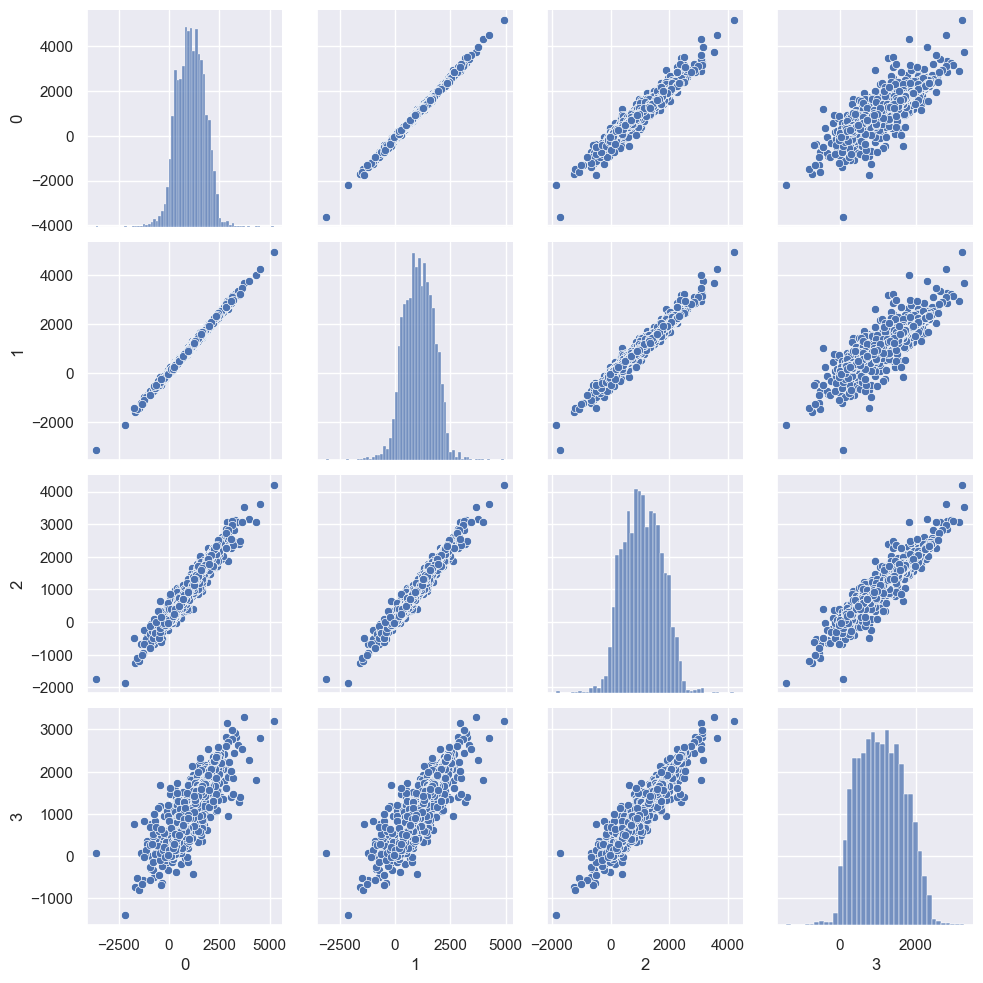

In [93]:
sns.pairplot(data = gabor.iloc[:, :4])

In [94]:
# use pca to reduce dimension 
pca = PCA(n_components=50)
gabor_pca = pca.fit_transform(gabor)
gabor_pca.shape

(3417, 50)

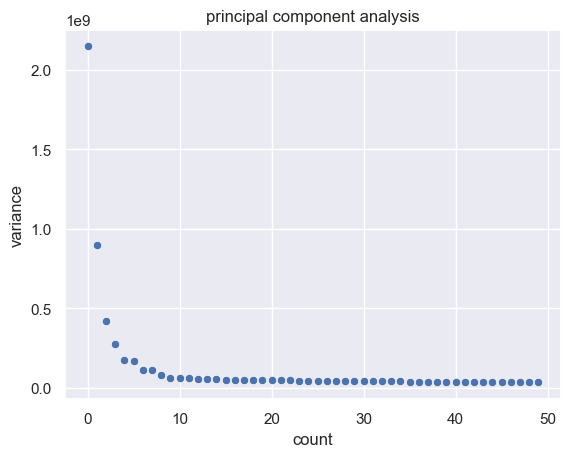

In [95]:
sns.scatterplot(pca.explained_variance_)
plt.ylabel("variance")
plt.xlabel("count")
plt.title("principal component analysis")
plt.show()

# b) HOG method 

In [96]:
# load dataset and clean it
hog = pd.read_csv("data/image_features/hog_images.csv")
hog.drop(["Unnamed: 0"], axis=1, inplace=True)
hog.head()

,0,1,2,3,4,5,6,7,8,9,...,16118,16119,16120,16121,16122,16123,16124,16125,16126,16127
0,0.027890,0.004876,0.005170,0.022251,0.019643,0.022872,0.034418,0.035434,0.012190,0.003782,...,0.001808,0.000909,0.000846,0.002690,0.001126,0.001389,0.002128,0.000181,0.000602,0.001719
1,0.026521,0.028824,0.009872,0.008235,0.008919,0.008964,0.020457,0.023751,0.020000,0.016253,...,0.003136,0.006072,0.000382,0.003022,0.004989,0.005440,0.014455,0.002852,0.001913,0.005106
2,0.031938,0.006571,0.004911,0.024744,0.023112,0.043100,0.015483,0.021517,0.005142,0.007178,...,0.035280,0.025682,0.025987,0.053660,0.019201,0.003624,0.011053,0.001986,0.017553,0.033530
3,0.029443,0.016464,0.008283,0.016752,0.023896,0.011337,0.024433,0.036592,0.009917,0.005153,...,0.003917,0.002015,0.005344,0.004156,0.001153,0.001664,0.004337,0.001751,0.004960,0.007774
4,0.027688,0.012014,0.001999,0.018064,0.008314,0.022086,0.020902,0.018797,0.010180,0.006095,...,0.008979,0.009316,0.001814,0.011844,0.021969,0.024830,0.043533,0.026870,0.015580,0.019230


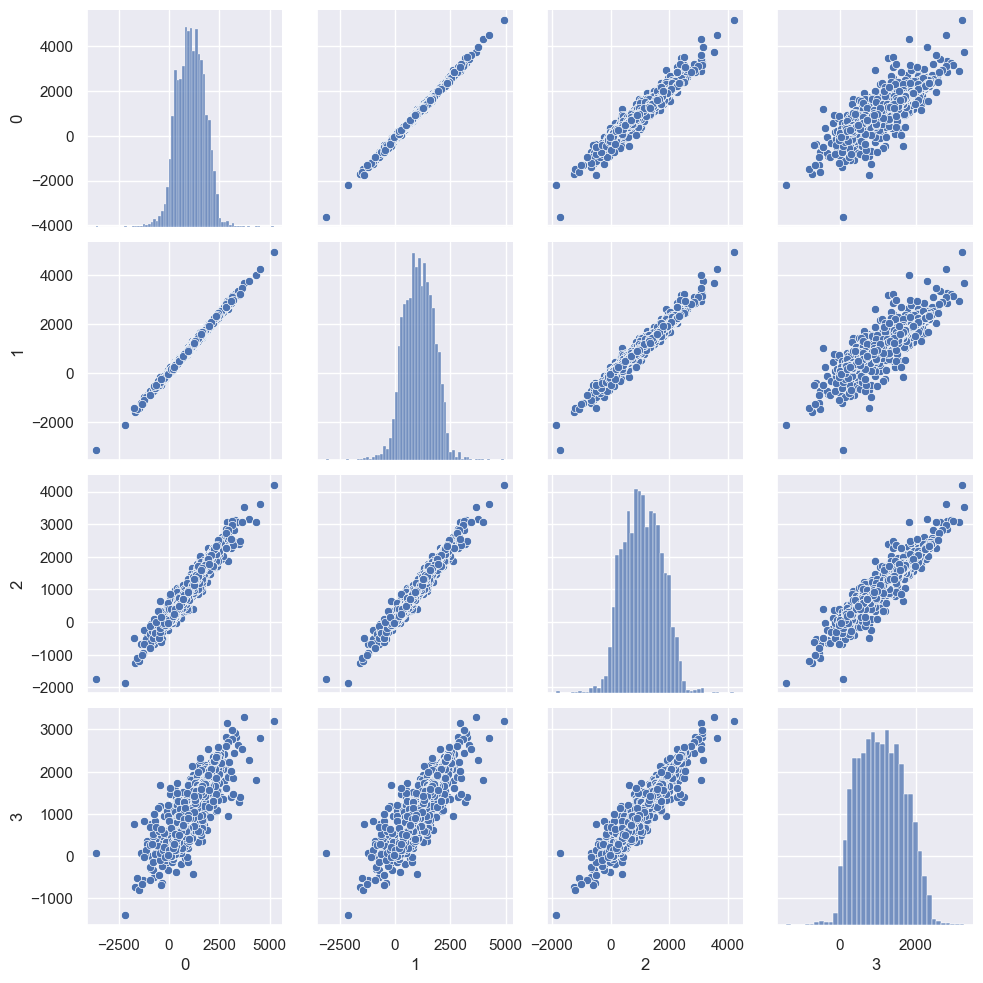

In [97]:
sns.pairplot(data = gabor.iloc[:, :4])

In [98]:
# use pca to reduce dimension 
pca = PCA(n_components=50)
hog_pca = pca.fit_transform(hog)
hog_pca.shape

(3417, 50)

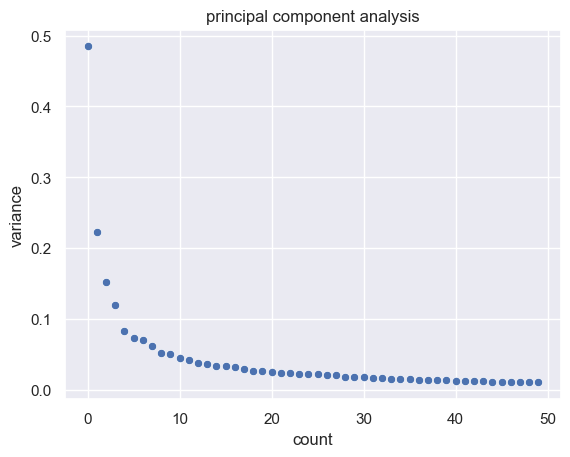

In [99]:
sns.scatterplot(pca.explained_variance_)
plt.ylabel("variance")
plt.xlabel("count")
plt.title("principal component analysis")
plt.show()

# c) hist method 

In [100]:
# load dataset and clean it
hist = pd.read_csv("data/image_features/hist_images.csv")
hist.drop(["Unnamed: 0"], axis=1, inplace=True)
hist.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.563272,0.217998,0.753932,0.414681,0.085917,0.376891,0.311282,0.055141,0.303468,0.203544,...,0.000000,0.001085,0.083352,0.000000,0.000723,0.140417,0.000000,0.001085,0.189787,0.000000
1,0.801652,0.398678,0.785209,0.439605,0.140545,0.425400,0.277438,0.071113,0.300061,0.173317,...,0.003393,0.011150,0.086231,0.003393,0.012298,0.105829,0.003958,0.015085,0.131586,0.010555
2,0.655758,0.073422,0.451619,0.382936,0.022542,0.237153,0.271592,0.021898,0.200854,0.218381,...,0.000605,0.008612,0.132031,0.003630,0.007382,0.193216,0.005142,0.004306,0.284672,0.013612
3,0.469685,0.112600,0.331780,0.295628,0.038417,0.146543,0.201871,0.019871,0.141603,0.183478,...,0.006586,0.022430,0.121211,0.005351,0.032748,0.178836,0.009056,0.079851,0.281500,0.034578
4,0.105990,0.165705,0.242187,0.079603,0.084028,0.120925,0.069048,0.071688,0.105049,0.069487,...,0.000000,0.001319,0.028793,0.000000,0.002199,0.038194,0.000000,0.004838,0.045246,0.000000


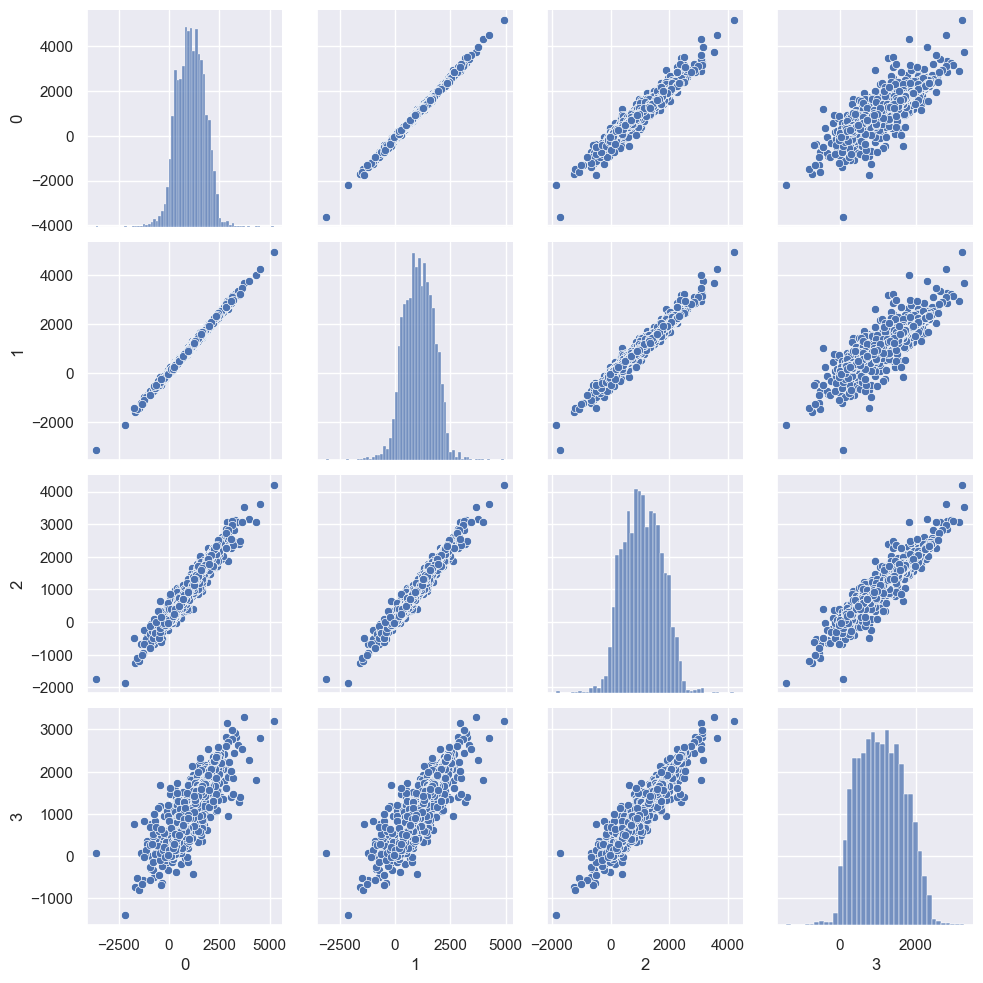

In [101]:
sns.pairplot(data = gabor.iloc[:, :4])

In [102]:
# use pca to reduce dimension 
pca = PCA(n_components=50)
hist_pca = pca.fit_transform(hist)
hist_pca.shape

(3417, 50)

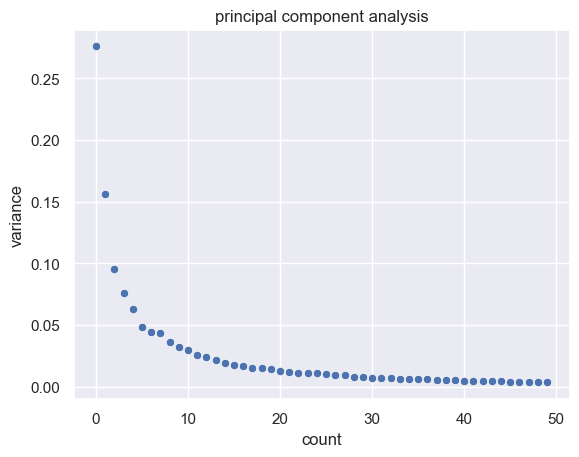

In [103]:
sns.scatterplot(pca.explained_variance_)
plt.ylabel("variance")
plt.xlabel("count")
plt.title("principal component analysis")
plt.show()

# d) fourier method

In [104]:
# load dataset and clean it
fourier = pd.read_csv("data/image_features/fourier_images.csv")
fourier.drop(["Unnamed: 0"], axis=1, inplace=True)
fourier.head()

,0,1,2,3,4,5,6,7,8,9,...,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499
0,-16.848228,6.176944,-4.136137,8.161227,-3.820443,15.109127,4.020130,6.259774,-2.891987,0.177162,...,-7.263400,2.866056,3.568074,-13.222697,-22.690258,-6.979371,-5.684688,-4.062215,-11.565677,6.975123
1,-6.917242,7.939178,-11.839225,4.060379,-20.073357,13.006491,3.184950,-4.669346,0.478672,5.149501,...,10.723111,5.217549,7.220093,-27.753928,5.845891,5.224526,-1.818246,-16.010515,9.352019,3.712801
2,-10.938957,-13.358283,10.129275,6.826723,-3.953103,12.823151,2.441299,14.077003,-3.036976,6.945489,...,-6.672986,0.072666,-1.256621,3.530532,11.801202,-6.198335,-4.725203,-11.425470,14.939600,7.826682
3,-219.951011,26.045178,-0.598442,-8.576766,-6.952723,5.227077,6.285412,-6.723530,-20.672249,4.721066,...,3.806944,-7.247493,11.103170,2.874597,-0.010284,3.938269,10.428763,8.646052,-2.344819,-22.461671
4,-4.317966,-2.877315,-8.364062,-9.351536,-15.715761,10.173876,-5.894136,3.813155,-18.933762,7.388925,...,1.011674,7.800293,10.650009,-10.560504,0.691306,14.303318,5.759990,-3.836409,6.941081,3.396710


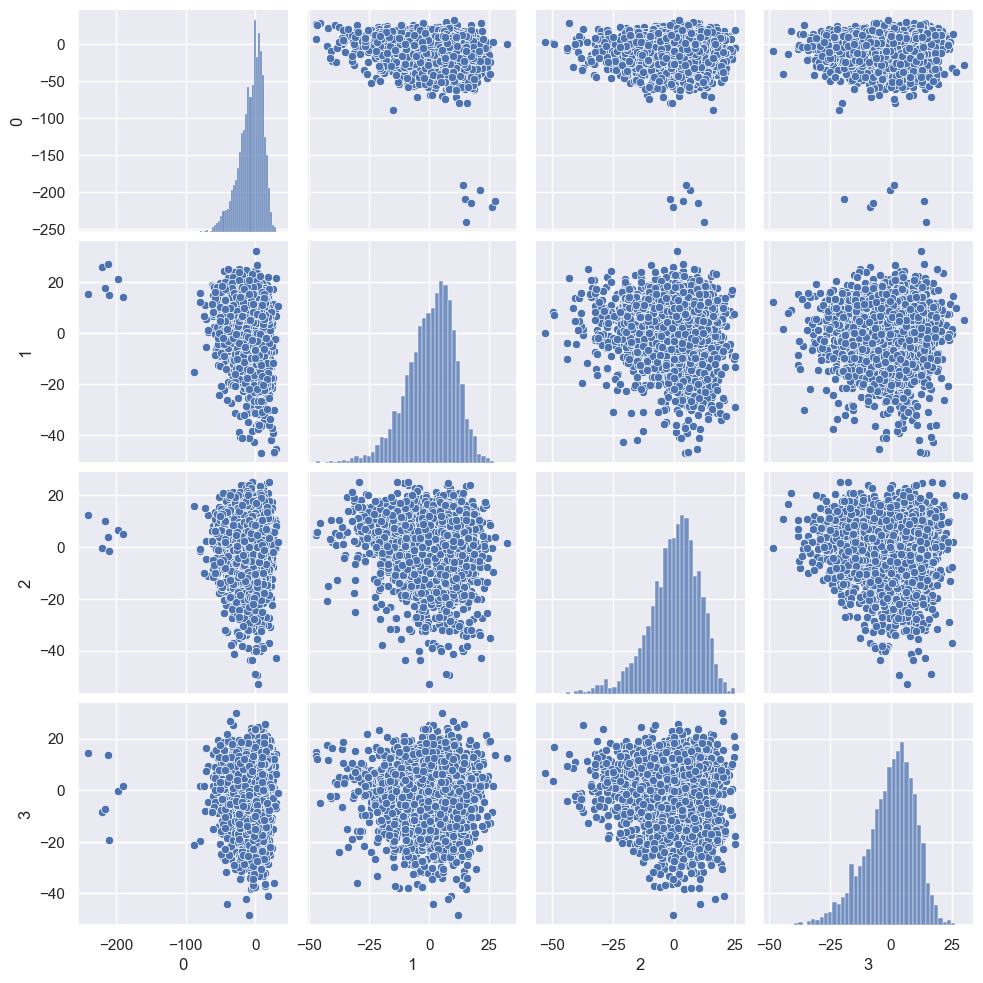

In [105]:
sns.pairplot(data = fourier.iloc[:, :4])

In [106]:
# use pca to reduce dimension 
pca = PCA(n_components=50)
fourier_pca = pca.fit_transform(fourier)
fourier_pca.shape

(3417, 50)

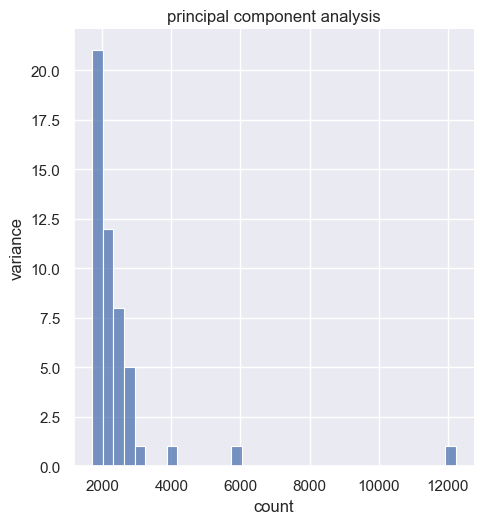

In [107]:
sns.displot(pca.explained_variance_)
plt.ylabel("variance")
plt.xlabel("count")
plt.title("principal component analysis")
plt.show()

# data normalization, data cleaning, saving cleaned data

In [108]:
import os

try:
    os.makedirs("data/clean_data")
    
except:
    pass

In [109]:
hist = MinMaxScaler().fit_transform(hist_pca)
hog = MinMaxScaler().fit_transform(hog_pca)
gabor = MinMaxScaler().fit_transform(gabor_pca)
fourier = MinMaxScaler().fit_transform(fourier_pca)
edge = MinMaxScaler().fit_transform(edge_images)

In [110]:
# save 
pd.DataFrame(hist).to_csv("data/clean_data/hist_cleaned.csv")
pd.DataFrame(fourier).to_csv("data/clean_data/fourier_cleaned.csv")
pd.DataFrame(edge).to_csv("data/clean_data/edge_cleaned.csv")
pd.DataFrame(gabor).to_csv("data/clean_data/gabor_cleaned.csv")
pd.DataFrame(hog).to_csv("data/clean_data/hog_cleaned.csv")
pd.DataFrame(labels).to_csv("data/clean_data/labels_cleaned.csv")